# Deep learning with pytorch a 60 minute blitz

A official tutorial of pytorch.org

https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html

## Tensors

In [2]:
import torch

x = torch.rand(5, 3)
x

tensor([[0.1723, 0.1178, 0.9082],
        [0.3305, 0.6965, 0.4695],
        [0.8595, 0.8073, 0.9019],
        [0.3212, 0.2302, 0.7329],
        [0.8611, 0.5811, 0.4323]])

In [3]:
x = torch.zeros(5, 3, dtype=torch.long)
x, x.shape, x.dtype

(tensor([[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]), torch.Size([5, 3]), torch.int64)

In [9]:
x1 = x.new_ones(3, 3)
x1, x1.dtype

(tensor([[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]]), torch.int64)

In [10]:
x2 = torch.ones_like(x, dtype=torch.float)
x2, x2.dtype

(tensor([[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]), torch.float32)

In [13]:
x.shape, x.size()

(torch.Size([5, 3]), torch.Size([5, 3]))

### Operations

In [19]:
x = torch.ones(5, 3, dtype=torch.float)
y = torch.rand_like(x, dtype=torch.float)

In [20]:
z = x + y  # torch.add(x, y)
z, z.dtype

(tensor([[1.8307, 1.8036, 1.2400],
         [1.1450, 1.4151, 1.6818],
         [1.6065, 1.0154, 1.2606],
         [1.9564, 1.8080, 1.5959],
         [1.9083, 1.9597, 1.3200]]), torch.float32)

In [22]:
y.add_(x)  # operation in place with underscore

tensor([[1.8307, 1.8036, 1.2400],
        [1.1450, 1.4151, 1.6818],
        [1.6065, 1.0154, 1.2606],
        [1.9564, 1.8080, 1.5959],
        [1.9083, 1.9597, 1.3200]])

In [24]:
z = y.view(-1, 5)
y, z

(tensor([[1.8307, 1.8036, 1.2400],
         [1.1450, 1.4151, 1.6818],
         [1.6065, 1.0154, 1.2606],
         [1.9564, 1.8080, 1.5959],
         [1.9083, 1.9597, 1.3200]]),
 tensor([[1.8307, 1.8036, 1.2400, 1.1450, 1.4151],
         [1.6818, 1.6065, 1.0154, 1.2606, 1.9564],
         [1.8080, 1.5959, 1.9083, 1.9597, 1.3200]]))

In [26]:
y[0, 0], y[0, 0].item()

(tensor(1.8307), 1.8306751251220703)

In [27]:
y[:, 0], y[:, 0].item()

ValueError: only one element tensors can be converted to Python scalars

In [28]:
y[0, 0] = 2.0
y, z

(tensor([[2.0000, 1.8036, 1.2400],
         [1.1450, 1.4151, 1.6818],
         [1.6065, 1.0154, 1.2606],
         [1.9564, 1.8080, 1.5959],
         [1.9083, 1.9597, 1.3200]]),
 tensor([[2.0000, 1.8036, 1.2400, 1.1450, 1.4151],
         [1.6818, 1.6065, 1.0154, 1.2606, 1.9564],
         [1.8080, 1.5959, 1.9083, 1.9597, 1.3200]]))

### Numpy bridge

In [29]:
a = torch.ones(5)
b = a.numpy()
a.add_(1)
a, b

(tensor([2., 2., 2., 2., 2.]), array([2., 2., 2., 2., 2.], dtype=float32))

In [32]:
b = b + 1
a, b

(tensor([2., 2., 2., 2., 2.]), array([3., 3., 3., 3., 3.], dtype=float32))

In [33]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
a, b

(array([2., 2., 2., 2., 2.]),
 tensor([2., 2., 2., 2., 2.], dtype=torch.float64))

## Autograd: automatic differentiation

vector-Jacobian product

참고: https://m0nads.wordpress.com/2019/04/10/pytorchs-backward-function/ 링크에서 torch가 단지 entry-wise product란 말이 misleading 

In [1]:
import torch

x = torch.ones(2, 2, requires_grad=True)
# x = torch.ones(2, 2)
# x[1, 1] = 2
# x.requires_grad = True
y = x + 2
z = y * y *3
out = z.mean()
x, y, z, out

(tensor([[1., 1.],
         [1., 1.]], requires_grad=True), tensor([[3., 3.],
         [3., 3.]], grad_fn=<AddBackward0>), tensor([[27., 27.],
         [27., 27.]], grad_fn=<MulBackward0>), tensor(27., grad_fn=<MeanBackward0>))

In [2]:
out.backward()
x.grad

# torch.autograd.grad(outputs=out, inputs=x)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])

#### vector jacobian product

The backward op works for a scalar output

still torch.autograd can compute the vector-Jacobian product.

\begin{equation}
{J} = \frac{\partial y}{\partial x} = \frac{\partial y_i}{\partial x_j}
\end{equation}

\begin{equation}
v \cdot J =  \frac{\partial l}{\partial y_i} \frac{\partial y_i}{\partial x_j} = \frac{\partial l}{\partial x_j}
\end{equation}

In [4]:
x = torch.randn(3, requires_grad=True)
y = x * 2
n = 1
while y.data.norm() < 1000:
    n += 1
    y = y * 2
n, 2**n, x, x * 2**n, y

(10,
 1024,
 tensor([-1.2127, -1.0809, -0.9385], requires_grad=True),
 tensor([-1241.8116, -1106.8900,  -961.0007], grad_fn=<MulBackward0>),
 tensor([-1241.8116, -1106.8900,  -961.0007], grad_fn=<MulBackward0>))

In [7]:
v = torch.tensor([0.1, 1.0, 0.0001])
torch.autograd.grad(outputs=y, inputs=x, grad_outputs=v)

(tensor([1.0240e+02, 1.0240e+03, 1.0240e-01]),)

\begin{equation}
v \cdot J =  \frac{\partial l}{\partial y_{IJ}} \frac{\partial y_{IJ}}{\partial x_{ij}} = \frac{\partial l}{\partial x_{ij}}
\end{equation}

In [11]:
x = torch.tensor([[1, 2, 3], [4, 5, 6.0]], requires_grad=True)
y = torch.log(x) + x[0, 0] + x[0, 1]
v = torch.tensor([[3, 2, 0], [4, 0, 1.0]])

y.backward(v)
x.grad

tensor([[13.0000, 11.0000,  0.0000],
        [ 1.0000,  0.0000,  0.1667]])

## Define the network

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    
    def __init__(self):
        super().__init__()
        # input channels, output channels, convolution kernel
        # input 1, 32, 32
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        # y = Wx + b
        self.fc1 = nn.Linear(16 * 6 * 6, 120)  # 16 channels x (6 x 6)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [16]:
params = list(net.parameters())
for param in params:
    print(param.size())

torch.Size([6, 1, 3, 3])
torch.Size([6])
torch.Size([16, 6, 3, 3])
torch.Size([16])
torch.Size([120, 576])
torch.Size([120])
torch.Size([84, 120])
torch.Size([84])
torch.Size([10, 84])
torch.Size([10])


In [30]:
inp = torch.randn(1, 1, 32, 32, requires_grad=True)
out = net(inp)
out

tensor([[-0.1004,  0.0975,  0.1391, -0.1189,  0.1190, -0.0006,  0.1314,  0.0259,
         -0.0457,  0.0876]], grad_fn=<AddmmBackward>)

In [31]:
net.zero_grad()  # zero the gradient buffers of all parameters
out.backward(torch.randn(1, 10))

In [32]:
inputs.grad

tensor([[[[ 1.4357e-03,  5.5486e-05,  6.2587e-04,  ...,  6.1656e-07,
            0.0000e+00,  0.0000e+00],
          [-1.5135e-03, -2.0111e-03, -1.1601e-03,  ..., -3.5936e-07,
            0.0000e+00,  0.0000e+00],
          [-2.1154e-03,  2.2251e-03, -2.4720e-03,  ...,  4.5225e-04,
            0.0000e+00,  0.0000e+00],
          ...,
          [-6.8252e-04, -5.2645e-04,  1.4927e-03,  ...,  0.0000e+00,
            0.0000e+00,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
            0.0000e+00,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
            0.0000e+00,  0.0000e+00]]]])

### Loss function

In [33]:
inp = torch.randn(1, 1, 32, 32)
out = net(inp)
target = torch.randn(10)
target = target.view(1, -1)
criterion = nn.MSELoss()
loss = criterion(out, target)
loss

tensor(1.5191, grad_fn=<MseLossBackward>)

### Backprop

In [34]:
net.zero_grad()
print(net.conv1.bias.grad)
loss.backward()
print(net.conv1.bias.grad)

tensor([0., 0., 0., 0., 0., 0.])
tensor([-0.0001,  0.0121,  0.0045,  0.0050, -0.0005,  0.0068])


### Update the weights

In [35]:
learning_rate = 0.01

for param in net.parameters():
    param.data.sub_(param.grad.data * learning_rate)

In [36]:
import torch.optim as optim

optimizer = optim.SGD(net.parameters(), lr=0.01)

# loop
optimizer.zero_grad()
out = net(inp)
loss = criterion(out, target)
loss.backward()
optimizer.step()

# TRAINING A CLASSIFIER: CIFAR10

In [37]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(
        (0.5, 0.5, 0.5),
        (0.5, 0.5, 0.5)
    )
])

trainset = torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=4,
    shuffle=True,
    num_workers=2
)

testset = torchvision.datasets.CIFAR10(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

testloader = torch.utils.data.DataLoader(
    testset,
    batch_size=4,
    shuffle=False,
    num_workers=2
)

classes = (
    'plane', 'car', 'bird', 'cat',
    'deer', 'dog', 'frog', 'horse', 'ship', 'trunk'
)

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


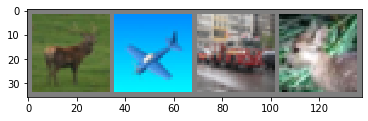

 deer plane trunk  deer


In [38]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

## Neural Network, Loss/optimizer, Train the network

In [76]:
import torch.nn as nn
import torch.nn.functional as F


device = torch.device('cuda:0')


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 5)
        self.pool = nn.MaxPool2d(2, 2)  # kernel_size, stride
        self.conv2 = nn.Conv2d(32, 64, 5)
        self.fc1 = nn.Linear(64 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()
net.to(device)  # gpu

Net(
  (conv1): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=1600, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [77]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [78]:
for epoch in range(10):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inp, labels = data[0].to(device), data[1].to(device)  # gpu
        optimizer.zero_grad()
        out = net(inp)
        loss = criterion(out, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' %
                 (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
            
print('Finished Training')

[1,  2000] loss: 2.135
[1,  4000] loss: 1.728
[1,  6000] loss: 1.550
[1,  8000] loss: 1.440
[1, 10000] loss: 1.372
[1, 12000] loss: 1.314
[2,  2000] loss: 1.194
[2,  4000] loss: 1.179
[2,  6000] loss: 1.120
[2,  8000] loss: 1.106
[2, 10000] loss: 1.057
[2, 12000] loss: 1.038
[3,  2000] loss: 0.937
[3,  4000] loss: 0.916
[3,  6000] loss: 0.913
[3,  8000] loss: 0.921
[3, 10000] loss: 0.902
[3, 12000] loss: 0.879
[4,  2000] loss: 0.759
[4,  4000] loss: 0.773
[4,  6000] loss: 0.783
[4,  8000] loss: 0.795
[4, 10000] loss: 0.764
[4, 12000] loss: 0.778
[5,  2000] loss: 0.637
[5,  4000] loss: 0.656
[5,  6000] loss: 0.678
[5,  8000] loss: 0.673
[5, 10000] loss: 0.699
[5, 12000] loss: 0.683
[6,  2000] loss: 0.538
[6,  4000] loss: 0.586
[6,  6000] loss: 0.580
[6,  8000] loss: 0.600
[6, 10000] loss: 0.601
[6, 12000] loss: 0.605
[7,  2000] loss: 0.454
[7,  4000] loss: 0.491
[7,  6000] loss: 0.527
[7,  8000] loss: 0.548
[7, 10000] loss: 0.525
[7, 12000] loss: 0.547
[8,  2000] loss: 0.399
[8,  4000] 

In [79]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

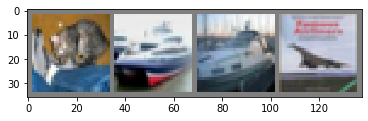

GroundTruth:    cat  ship  ship plane


In [80]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [81]:
net = Net()
net.load_state_dict(torch.load(PATH))
outputs = net(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat   car   car plane


In [82]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 71 %


In [83]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 75 %
Accuracy of   car : 83 %
Accuracy of  bird : 52 %
Accuracy of   cat : 54 %
Accuracy of  deer : 59 %
Accuracy of   dog : 61 %
Accuracy of  frog : 81 %
Accuracy of horse : 79 %
Accuracy of  ship : 83 %
Accuracy of trunk : 82 %
